In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_att_salary_17-18')

In [3]:
rbs.dtypes

NAME         object
ATT           int64
ATT_rank    float64
salary        int64
dtype: object

In [4]:
rbs.head()

,NAME,ATT,ATT_rank,salary
0,Le'Veon Bell,321,1.0,12120000
1,LeSean McCoy,287,2.0,8000000
2,Melvin Gordon,284,3.0,2667443
3,Todd Gurley,279,4.0,3455796
4,Leonard Fournette,268,7.0,6787711


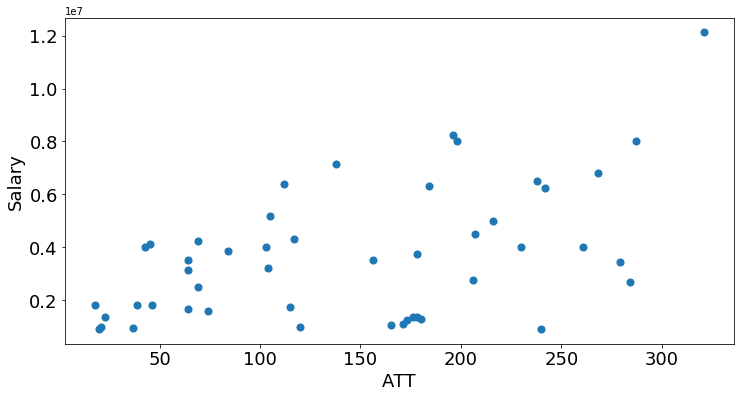

In [5]:
ax = rbs.plot(kind="scatter", x = 'ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.01770444e-16, -7.86407976e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.22519261, -0.86031422],
       [ 1.01934548,  1.64532346],
       [ 0.94681767,  0.03402717],
       [ 0.28879258, -0.9840011 ],
       [-0.73115231,  0.21318149]])

In [11]:
km.predict(X)

array([1, 1, 2, 2, 1, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 2, 3, 3, 3, 3,
       3, 2, 1, 3, 4, 3, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,ATT,ATT_rank,salary,clusters
0,Le'Veon Bell,321,1.0,12120000,1
1,LeSean McCoy,287,2.0,8000000,1
2,Melvin Gordon,284,3.0,2667443,2
3,Todd Gurley,279,4.0,3455796,2
4,Leonard Fournette,268,7.0,6787711,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.11000000e+01, 1.53132350e+06],
       [2.30222222e+02, 7.70658844e+06],
       [2.24111111e+02, 3.73547100e+06],
       [1.68666667e+02, 1.22649122e+06],
       [8.27272727e+01, 4.17700545e+06]])

In [14]:
rbs.groupby('clusters')[['ATT', 'salary']].mean()

,ATT,salary
clusters,,
0,41.100000,1.531324e+06
1,230.222222,7.706588e+06
2,224.111111,3.735471e+06
3,168.666667,1.226491e+06
4,82.727273,4.177005e+06


In [15]:
centroids = rbs.groupby('clusters')[['ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

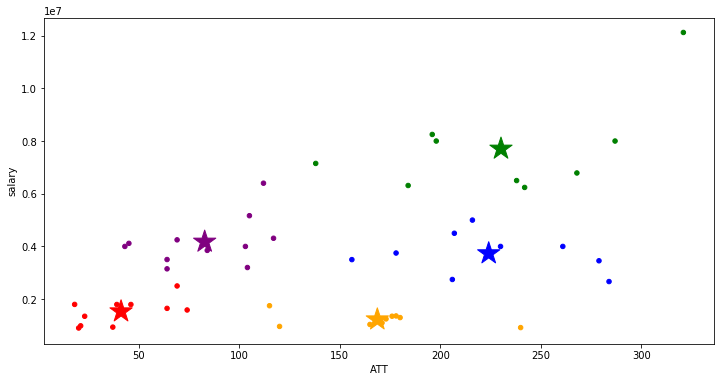

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'ATT', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

15.948376149777285

In [18]:
silhouette_score(X, km.labels_)

0.46367664041255746